## BlueTides Mock Image Catalogue - Example Codes
This code walks through the steps to 
- read the 'BlueTidesMockImageCatalogue.csv' file
- select BlueTides galaxies based on their properties
- plot these galaxies in a range of telescopes and filters
This code can be used to reproduce the images in Figures 2 and 3 of the Mock Catalogue Release paper.


Note that the key functions can be found in bluetides_mock_catalogue_functions if you wish to make any modifications. If bluetides_mock_catalogue_functions is not in the current directory, you will need to add its directory to your PYTHONPATH.




To run this code as-is, this requires the files:

- hlsp_bluetides_multi_multi_all_multi_v1_sim.csv  


- hlsp_bluetides_jwst_nircam_z7-file1_f090w_v1_sim-psf.fits
- hlsp_bluetides_jwst_nircam_z7-file1_f115w_v1_sim-psf.fits
- hlsp_bluetides_jwst_nircam_z7-file1_f150w_v1_sim-psf.fits
- hlsp_bluetides_jwst_nircam_z7-file1_f200w_v1_sim-psf.fits
- hlsp_bluetides_jwst_nircam_z7-file1_f277w_v1_sim-psf.fits
- hlsp_bluetides_jwst_nircam_z7-file1_f356w_v1_sim-psf.fits
- hlsp_bluetides_jwst_nircam_z7-file1_f410m_v1_sim-psf.fits
- hlsp_bluetides_jwst_nircam_z7-file1_f444w_v1_sim-psf.fits
- hlsp_bluetides_jwst_miri_z7-file1_f560w_v1_sim-psf.fits
- hlsp_bluetides_jwst_miri_z7-file1_f770w_v1_sim-psf.fits  


- hlsp_bluetides_hst_wfc3_z7-file1_f105w_v1_sim-psf.fits
- hlsp_bluetides_roman_wfi_z7-file1_f106_v1_sim-psf.fits
- hlsp_bluetides_euclid_nisp_z7-file1_y_v1_sim-psf.fits
- hlsp_bluetides_vista_vircam_z7-file1_y_v1_sim-psf.fits
- hlsp_bluetides_subaru_hsc_z7-file1_y_v1_sim-psf.fits

For a less download-intensive test, download the z=12 files (replace z7-file1 with z12), and change to z=12 in the cell 2 below.

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
from astropy.io import fits

import bluetides_mock_catalogue_functions as mock_functions

Select redshift. We will consider z=7, but z=8,9,10,11 and 12 are also available.

In [2]:
z=7

Load in the catalogue as a Catalogue object. This requires specifying the directory which contains both the 'hlsp_bluetides_multi_multi_all_multi_v1_sim.csv' file and the catalogue fits images, 'image_path'. 

In [3]:
cat=mock_functions.Catalogue(z=z,image_path='/home/mmarshal/FinalImages/FullCatalogue/')

print(cat.__doc__)


    A class to represent a catalogue.

    Attributes:
    image_path -- Str: Path to BlueTides Mock Catalogue .csv and .fits files
    z -- Int: redshift of interest
    catalogue -- Table: Properties of galaxies at redshift z as read from .csv file
    stellarMass -- Array: Stellar mass of all galaxies at redshift z, in solar masses
    BHmass -- Array: Black hole mass of all galaxies at redshift z, in solar masses
    haloMass -- Array: Halo mass of all galaxies at redshift z, in solar masses
    nGals -- Int: Number of galaxies in the catalgue at redshift z

    Methods:
    print_constraint_options -- Print a list of catalogue columns with their minimum and maximum values
    select_galaxies_with_constraints -- Select galaxies that satisfy the requested property constraints
    select_galaxies_with_indices -- Select galaxies from the catalogue with specified indices
    plot_galaxies -- Plot the galaxies in the selected sub-catalogue
    


List the parameters given in the catalogue file, alongside their ranges, if you would like to select a galaxy sample based on these properties. There is the option to view the luminosity and fluxes as magnitudes instead of erg/s/Hz and nJy.

In [4]:
cat.print_constraint_options()

#cat.print_constraint_options(lum_constraint_type='mag',flux_constraint_type='mag') 
# To view the luminosities as magnitudes instead of erg/s/Hz and the fluxes as magnitudes instead of nJy


redshift                        :  (Min, Max) = 7, 7
fileNumber                      :  (Min, Max) = 1, 4
extensionNumber                 :  (Min, Max) = 1, 17764
stellarMass [Msolar]            :  (Min, Max) = 1.95e+07 = 1.29e+11
BHmass [Msolar]                 :  (Min, Max) = 7.17e+05 = 7.69e+08
BHluminosity [erg/s]            :  (Min, Max) = 0.00e+00 = 9.85e+46
haloMass [Msolar]               :  (Min, Max) = 7.36e+10 = 8.70e+12
lum_FUV [erg/s/Hz]              :  (Min, Max) = 3.24e+28, 2.85e+30
flux_jwst.nircam.f090w [nJy]    :  (Min, Max) = 5.4, 104.6
radius_jwst.nircam.f090w [pkpc] :  (Min, Max) = 0.55, 1.82
flux_jwst.nircam.f115w [nJy]    :  (Min, Max) = 41.2, 813.5
radius_jwst.nircam.f115w [pkpc] :  (Min, Max) = 0.51, 1.79
flux_jwst.nircam.f150w [nJy]    :  (Min, Max) = 39.8, 980.6
radius_jwst.nircam.f150w [pkpc] :  (Min, Max) = 0.49, 1.79
flux_jwst.nircam.f200w [nJy]    :  (Min, Max) = 35.1, 1121.8
radius_jwst.nircam.f200w [pkpc] :  (Min, Max) = 0.49, 1.78
flux_jwst.nircam.f277w

### Select the galaxies
Select galaxies via their properties. Note that all of the constraints are in log space except radius. Any combination of properties can be used for the constraints.

In [5]:
print(cat.select_galaxies_with_constraints.__doc__)

Select galaxies from the catalogue that satisfy the requested property constraints.

        Keyword arguments:
        stellar_mass_constraint -- Tuple: (min stellar mass, max stellar mass). Specified in log space (default None)
        bh_mass_constraint -- Tuple: (min black hole mass, max black hole mass). Specified in log space (default None)
        halo_mass_constraint -- Tuple: (min halo mass, max halo mass). Specified in log space (default None)
        uv_lum_constraint -- Tuple: (min FUV (1500A) luminosity/magnitude, max FUV luminosity/magnitude) (default None)
        uv_constraint_type -- Str: 'lum' for constraint specified in log luminosity, in log(erg/s/Hz) (default),
                                or 'mag' for constraint specified in magnitudes.
        flux_constraint -- List of tuples: [(min flux filter 1, max flux in filter 1), ...,
                                            (min flux in filter N, max flux in filter N)] (default None)
        flux_constraint_type --

Select only galaxies with stellar mass in 10^(10.8)-10^(10.9) solar masses if z=7, or 10^(8.8)-10^(8.9) solar masses if z=12. Print the corresponding catalogue rows.

In [6]:
if z==7:
    cat.select_galaxies_with_constraints(stellar_mass_constraint=(10.8,10.9))
    
if z==12:
    cat.select_galaxies_with_constraints(stellar_mass_constraint=(8.8,8.9))
    
print('Selected {} galaxies'.format(cat.nGalsSelected))

cat.catalogueSelected

Selected 10 galaxies


,redshift,fileNumber,extensionNumber,stellarMass,BHmass,BHluminosity,haloMass,lum_FUV,flux_jwst.nircam.f090w,radius_jwst.nircam.f090w,...,flux_vista.vircam.y,radius_vista.vircam.y,flux_vista.vircam.j,radius_vista.vircam.j,flux_vista.vircam.h,radius_vista.vircam.h,flux_vista.vircam.ks,radius_vista.vircam.ks,flux_spitzer.irac.ch1,flux_spitzer.irac.ch2
3,7.0,1,4,7.077269e+10,292754850.0,7.705151e+46,1.756668e+12,8.049547e+29,79.736259,1.070337,...,634.296875,2.182002,653.300598,2.182002,714.755920,2.182002,709.739441,2.182002,1330.386230,1346.872070
7,7.0,1,8,6.529585e+10,269217060.0,5.073656e+46,1.103594e+12,2.229542e+29,23.772875,1.136111,...,252.938187,2.182002,235.385071,2.182002,281.379059,2.182002,282.228943,2.120525,660.696777,725.953369
12,7.0,1,13,6.757928e+10,185481400.0,4.881772e+46,1.786741e+12,5.485729e+29,41.874634,1.617615,...,425.490479,2.466510,451.371582,2.466510,492.717194,2.412294,495.302612,2.412294,965.721252,1023.901367
18,7.0,1,19,7.548951e+10,154462850.0,4.065380e+46,1.414176e+12,3.832500e+29,29.638481,1.510049,...,306.549316,2.412294,301.898132,2.412294,325.507965,2.356832,315.564819,2.356832,614.631409,638.563660
32,7.0,1,33,6.419608e+10,115706830.0,2.960237e+46,1.234732e+12,3.446866e+29,32.144596,1.279052,...,304.824371,2.241794,315.772766,2.241794,366.901489,2.241794,380.985077,2.182002,804.944275,900.638855
43,7.0,1,44,7.899811e+10,262581890.0,2.494900e+46,1.632567e+12,3.172355e+29,27.379475,1.001346,...,322.160675,2.241794,284.672455,2.300032,343.184814,2.241794,335.753571,2.241794,800.186890,875.004395
52,7.0,1,53,7.101840e+10,265167410.0,2.217095e+46,1.699014e+12,4.337542e+29,31.754704,1.626427,...,342.621185,2.519559,366.869965,2.519559,421.866547,2.466510,448.732300,2.466510,979.278381,1094.715698
106,7.0,1,107,6.336066e+10,333458340.0,1.091541e+46,1.058036e+12,1.238792e+29,15.996870,1.049592,...,150.419510,2.120525,142.807556,2.120525,164.670456,2.120525,163.844452,2.120525,374.524628,413.110565
179,7.0,1,180,6.447992e+10,123055790.0,5.396326e+45,1.315202e+12,1.870919e+29,21.386765,1.402856,...,209.015030,2.356832,206.235748,2.300032,243.364502,2.300032,249.210083,2.241794,562.785583,630.946045
931,7.0,1,932,6.699042e+10,63467252.0,9.643483e+44,8.704022e+12,2.853553e+30,36.372753,1.799712,...,436.439789,2.622440,475.036530,2.571514,584.096069,2.571514,652.167236,2.519559,1533.853149,1845.781738


Select galaxies based on additional properties: black hole mass, halo mass, and flux in a JWST NIRCam filter.

In [7]:
if z==7:
    cat.select_galaxies_with_constraints(stellar_mass_constraint=(10,10.5),bh_mass_constraint=(8,8.5),
                           halo_mass_constraint=(11.5,12),
                           flux_constraint=[('JWST.NIRCAM.F115W',50,100)])
if z==12:
    #Need to modify as no galaxies have those properties at z=12
    cat.select_galaxies_with_constraints(stellar_mass_constraint=(8,9),bh_mass_constraint=(5,6),
                           halo_mass_constraint=(10.5,11),
                           flux_constraint=[('JWST.NIRCAM.F444W',3,10)]) 
    
print('Selected {} galaxies'.format(cat.nGalsSelected))


Selected 23 galaxies


Make the same selection, but specify the flux constraints as magnitudes instead of in nJy.

In [8]:
if z==7:
    mag = -2.5*np.log10(np.array([50,100])*1e-9)+8.90
    cat.select_galaxies_with_constraints(stellar_mass_constraint=(10,10.5),bh_mass_constraint=(8,8.5),
                           halo_mass_constraint=(11.5,12),
                           flux_constraint=[('JWST.NIRCAM.F115W',mag[0],mag[1])],flux_constraint_type='mag')

if z==12:
    mag = -2.5*np.log10(np.array([3,10])*1e-9)+8.90
    cat.select_galaxies_with_constraints(stellar_mass_constraint=(8,9),bh_mass_constraint=(5,6),
                           halo_mass_constraint=(10.5,11),
                           flux_constraint=[('JWST.NIRCAM.F444W',mag[0],mag[1])],flux_constraint_type='mag') 
print('Selected {} galaxies'.format(cat.nGalsSelected))


Selected 23 galaxies


Select on UV magnitude.

In [9]:
cat.select_galaxies_with_constraints(uv_lum_constraint=(-21.1,-21.2),uv_constraint_type='mag')

print('Selected {} galaxies'.format(cat.nGalsSelected))


Selected 2087 galaxies


Add a flux constraint in another filter.

In [10]:
if z==7:
    cat.select_galaxies_with_constraints(stellar_mass_constraint=(10,10.5),bh_mass_constraint=(8,8.5),
                           halo_mass_constraint=(11.5,12),
                           flux_constraint=[('JWST.NIRCAM.F115W',50,100),('HST.WFC3.f105w',50,100)])
    
    print('Selected {} galaxies'.format(cat.nGalsSelected))
    

Selected 17 galaxies


Instead of selecting galaxies via their properties, select via their indices in the catalogue. For example, Figures 2 and 3 in the Mock Catalogue Release paper, we use galaxy indices 240, 515, and 3701 (randomly chosen). Select these, and print the corresponding catalogue rows.

In [11]:
if z==7:
    cat.select_galaxies_with_indices([240,515,3701])
    
if z==12:
    cat.select_galaxies_with_indices([1,2,3]) #Only 31 galaxies at z=12

cat.catalogueSelected

,redshift,fileNumber,extensionNumber,stellarMass,BHmass,BHluminosity,haloMass,lum_FUV,flux_jwst.nircam.f090w,radius_jwst.nircam.f090w,...,flux_vista.vircam.y,radius_vista.vircam.y,flux_vista.vircam.j,radius_vista.vircam.j,flux_vista.vircam.h,radius_vista.vircam.h,flux_vista.vircam.ks,radius_vista.vircam.ks,flux_spitzer.irac.ch1,flux_spitzer.irac.ch2
240,7.0,1,241,4.670138e+10,138758060.0,3.900770e+45,1.332076e+12,3.601339e+29,22.038994,1.265224,...,210.564529,2.300032,208.807938,2.300032,231.783096,2.241794,229.303848,2.241794,484.205200,523.094482
515,7.0,1,516,1.204752e+10,44596010.0,1.852940e+45,3.497844e+11,9.011230e+28,13.434932,1.143827,...,102.919060,2.057211,108.351852,2.057211,120.338409,2.057211,125.089157,1.991886,260.110931,297.770020
3701,7.0,1,3702,5.035402e+09,4998380.5,2.257284e+44,3.931238e+11,1.863760e+29,19.357805,1.312985,...,130.007187,2.120525,152.237396,2.120525,168.376709,2.120525,180.720215,2.057211,336.624664,374.237793


### Plot the selected galaxies
Now plot the selected catalogue with a range of the available filters and telescopes

<IPython.core.display.Javascript object>


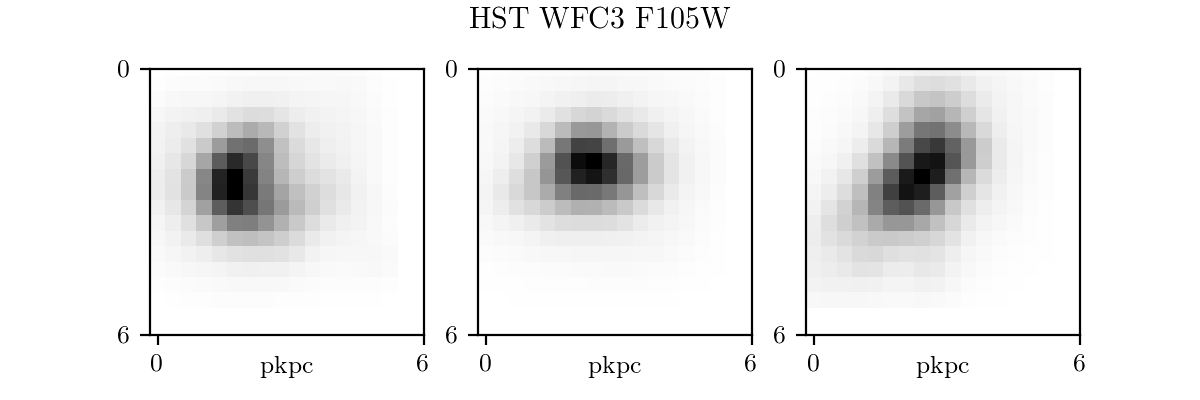

In [12]:
fig=cat.plot_galaxies('HST','WFC3','f105w')

<IPython.core.display.Javascript object>


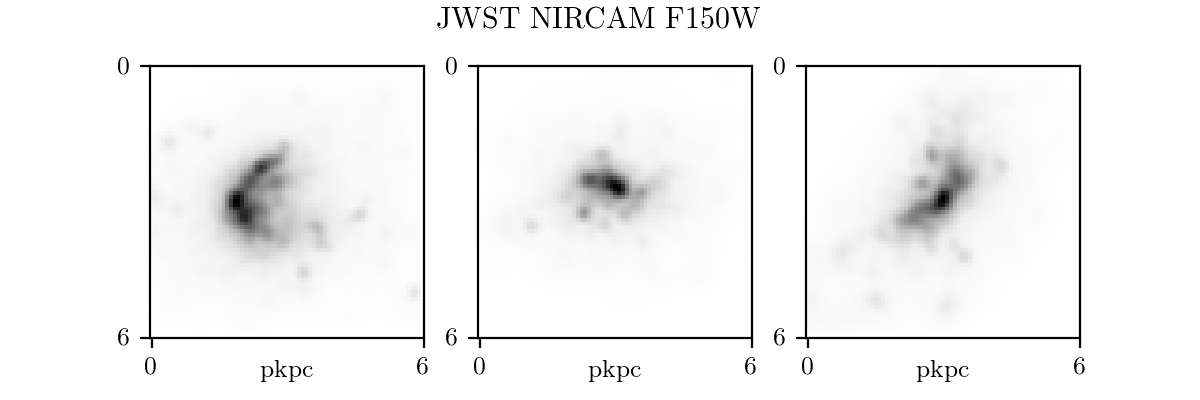

In [13]:
fig=cat.plot_galaxies('JWST','NIRCam','F150W')

It is possible to include colourbars via setting colorbar=True:

<IPython.core.display.Javascript object>


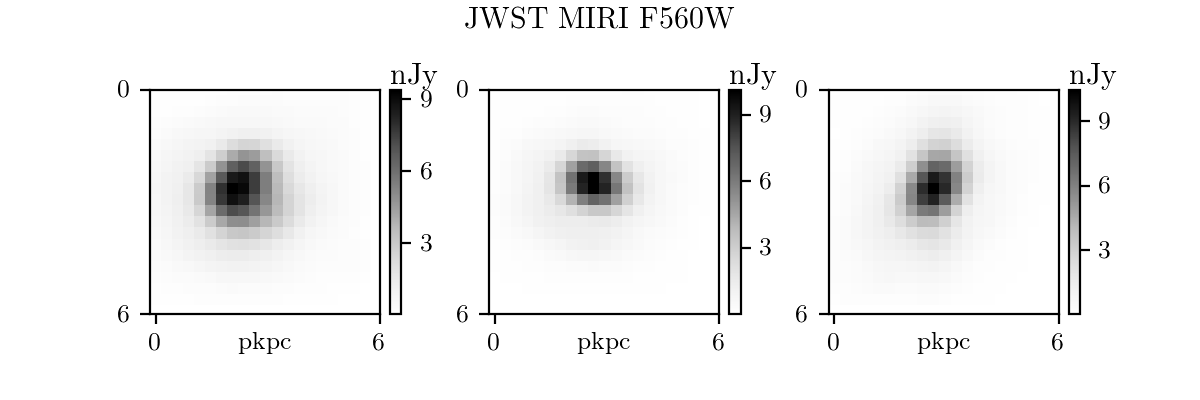

In [14]:
fig=cat.plot_galaxies('JWST','MIRI','F560W',colorbar=True)

Produce Figure 3, the three z=7 galaxies in all JWST filters in the catalogue

<IPython.core.display.Javascript object>


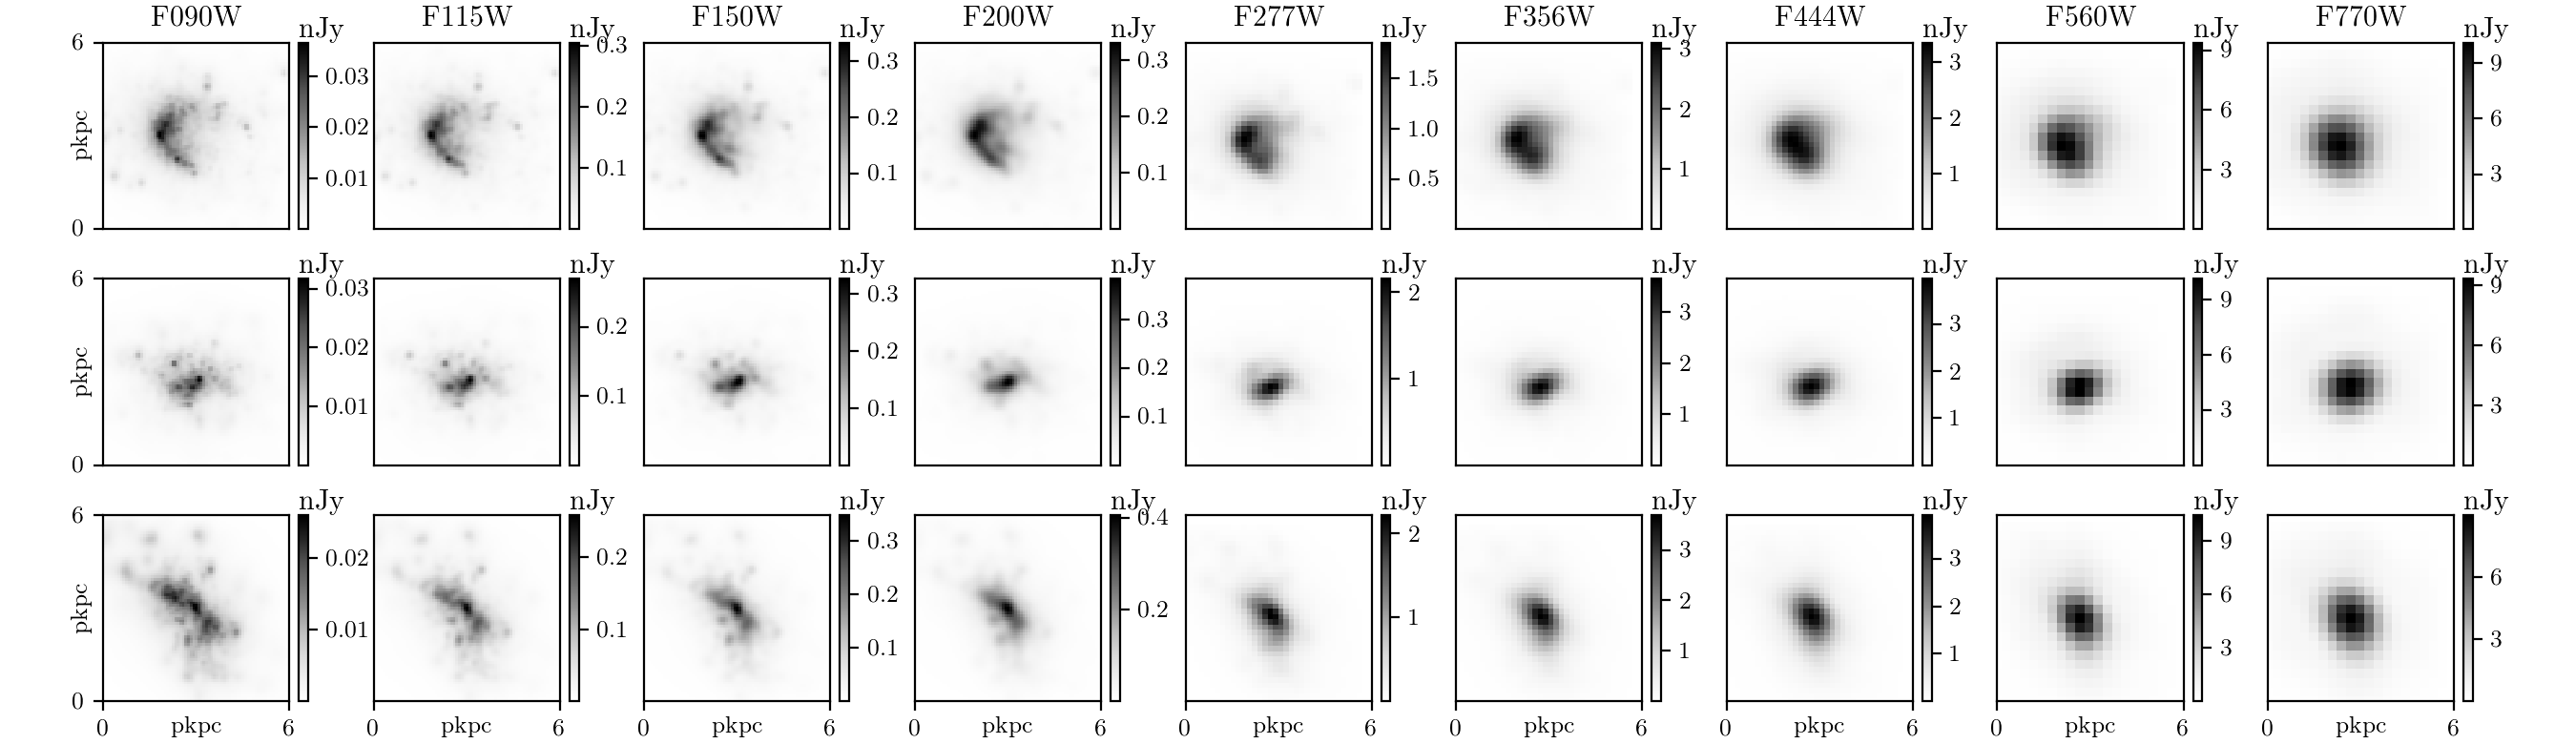

In [15]:
fig=cat.plot_galaxies('JWST','all','all',colorbar=True)
#plt.savefig('../plots/example_images_colorbar.pdf')

<IPython.core.display.Javascript object>


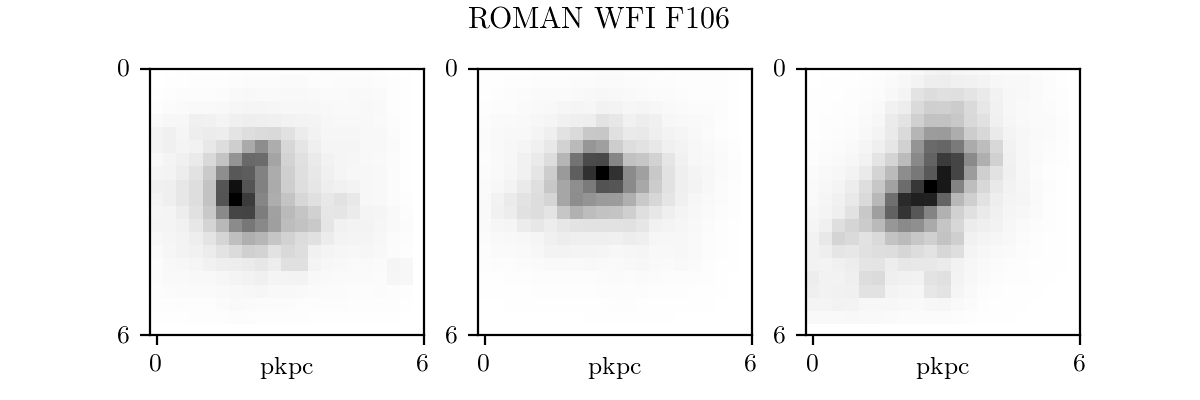

In [16]:
fig=cat.plot_galaxies('Roman','WFI','F106')


Produce Figure 2, the three z=7 galaxies in the Y-band of each telescope in the catalogue.

<IPython.core.display.Javascript object>


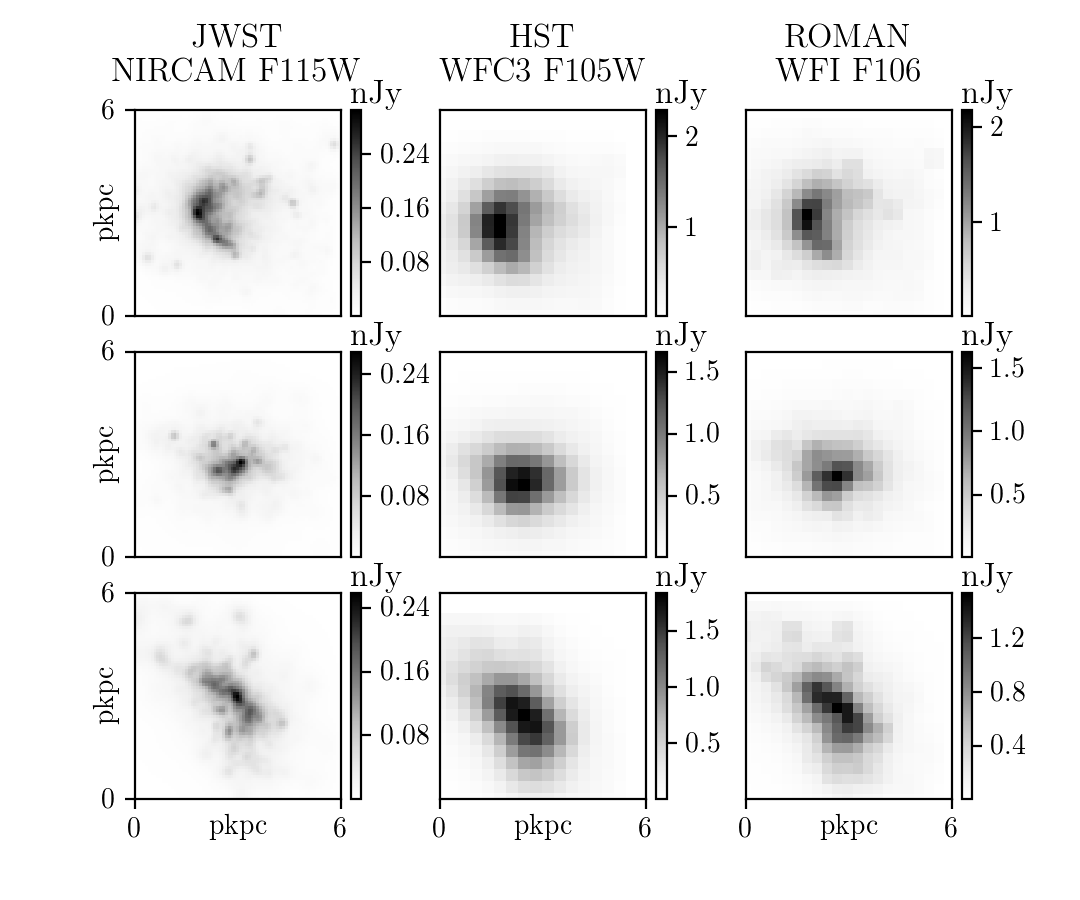

<IPython.core.display.Javascript object>


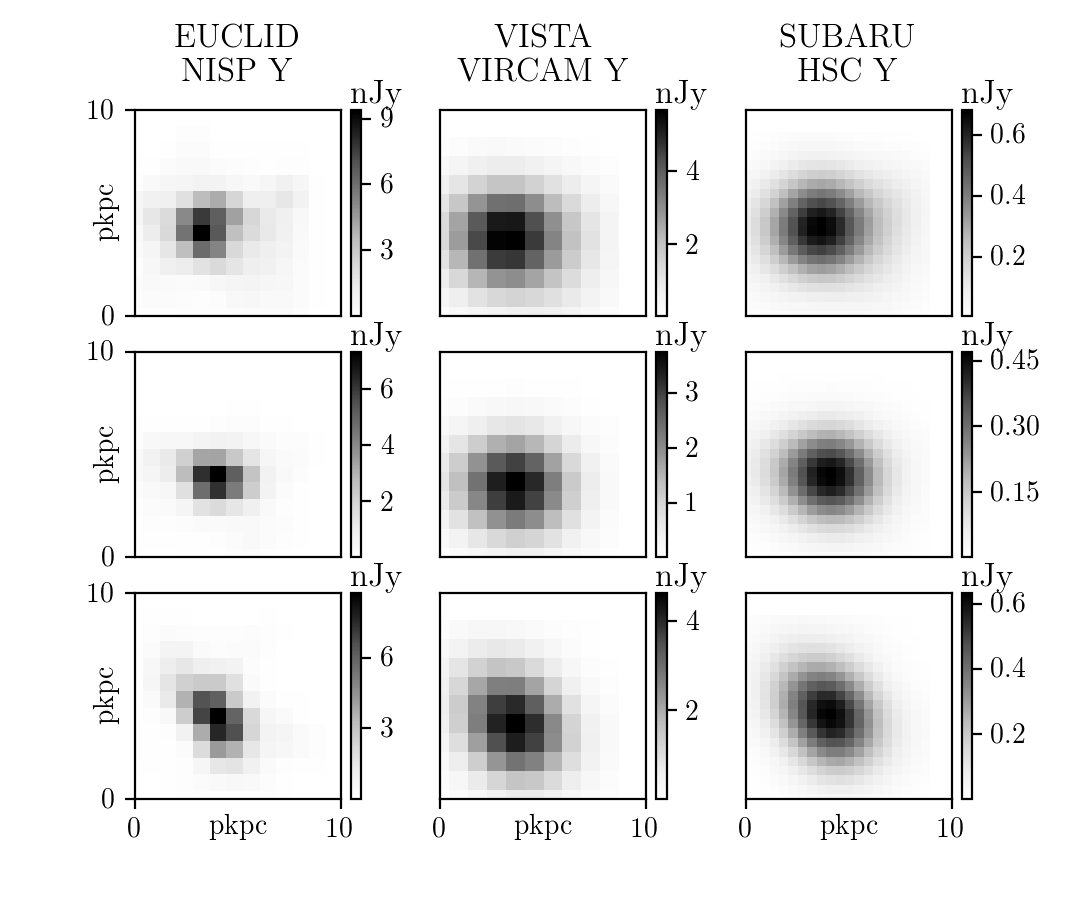

In [17]:
rcParams['font.size'] = (10)
fig,fig2=cat.plot_galaxies('ALL','ALL','Y',colorbar=True)
#fig.savefig('../plots/YbandImages_1_colorbar.pdf')
#fig2.savefig('../plots/YbandImages_2_colorbar.pdf')